In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import shutil
import pandas as pd
import IPython
from tqdm import tqdm

In [2]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

def df_set(df, image_name, key, value):
    df.at[df.index[df['image_name'] == image_name][0], key] = value

def df_get(df, image_name, key):
    return df.at[df.index[df['image_name'] == image_name][0], key]

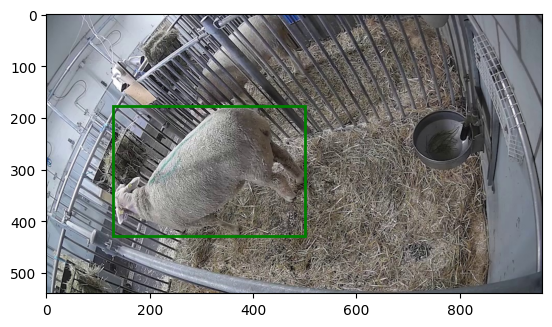

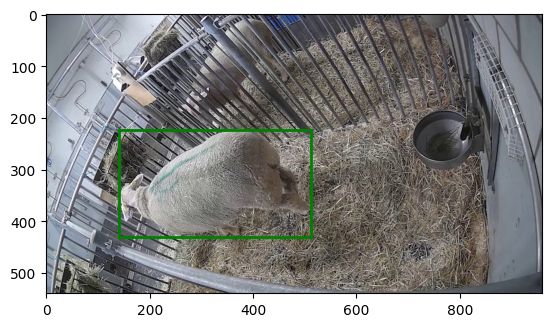

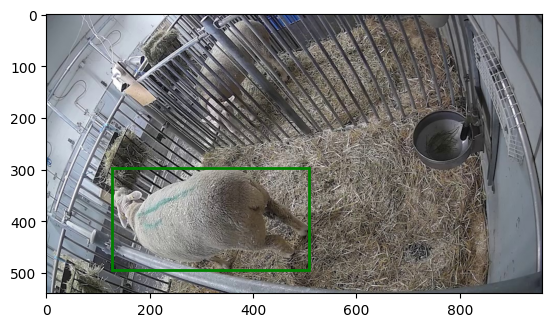

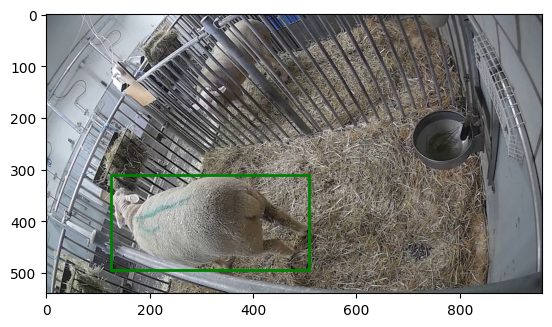

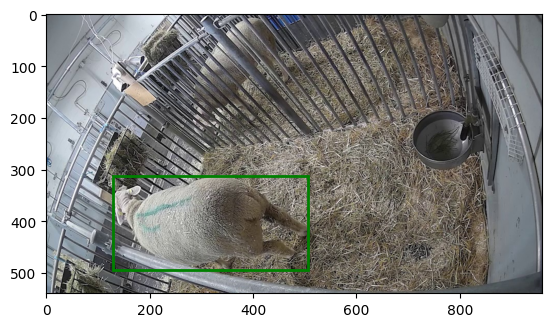

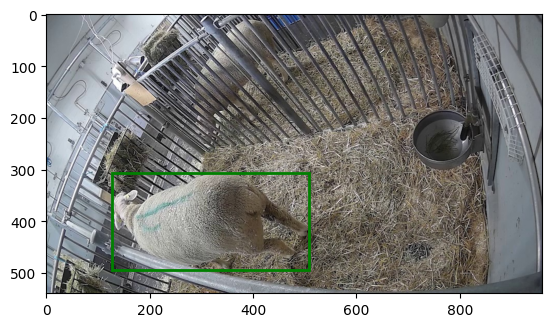

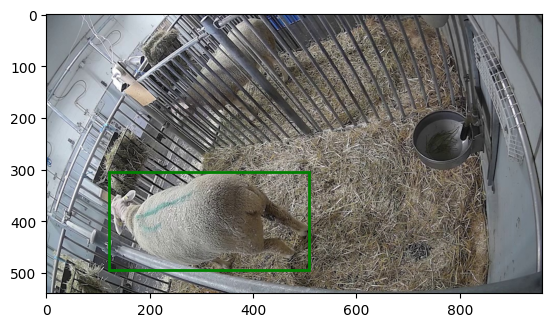

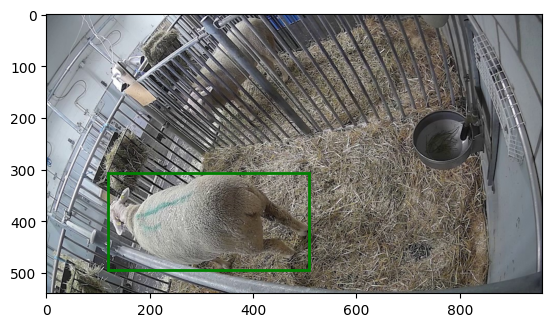

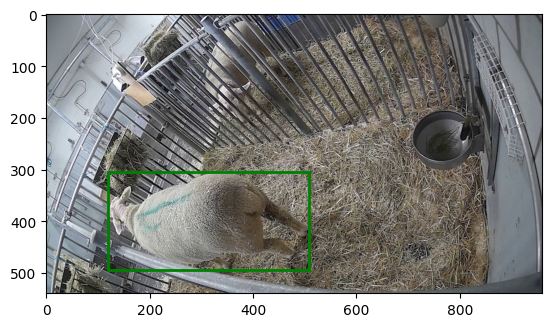

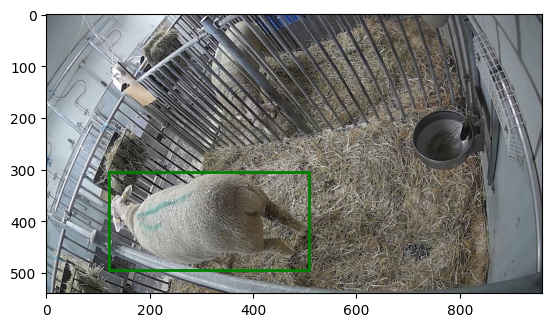

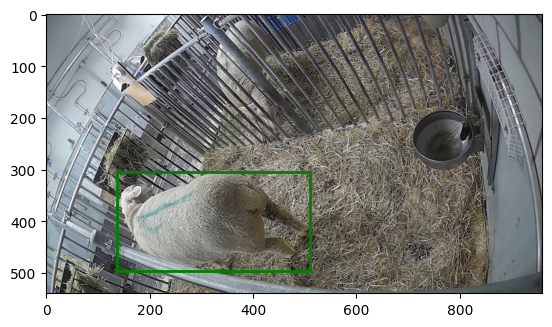

In [44]:
root_path = "/workspace/good_bad/S013-20220917-110000-150000/top/split_1" 

batch_idx = 91000 - 9*500
frame_idx = batch_idx
batch_size = 500
reach = 5

frame_names = [
    p for p in os.listdir(inv_vid)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]

frame_names.sort(key=lambda p: int(os.path.splitext(p)[0]))
df = pd.read_csv(os.path.join(inv_vid, "data.csv"))

curr_frame_names = frame_names[frame_idx:frame_idx + batch_size + reach]
for frame_name in curr_frame_names[::50]:
    frame = Image.open(os.path.join(root_path, frame_name))
    x_min = df_get(df, frame_name, 'min_x')
    y_min = df_get(df, frame_name, 'min_y')
    x_max = df_get(df, frame_name, 'max_x')
    y_max = df_get(df, frame_name, 'max_y')
    plt.imshow(frame)
    show_box([x_min, y_min, x_max, y_max], plt.gca())
    plt.show()
    plt.clf()
plt.close('all')

In [42]:
plt.close('all')

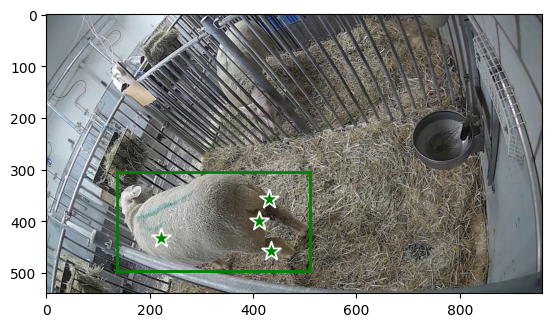

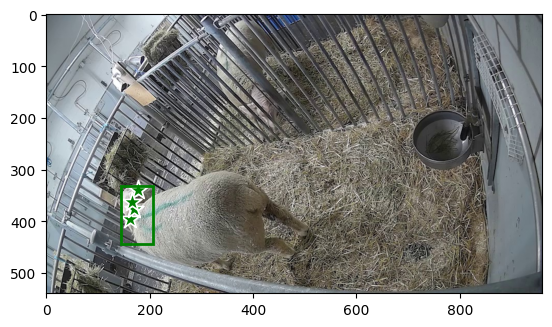

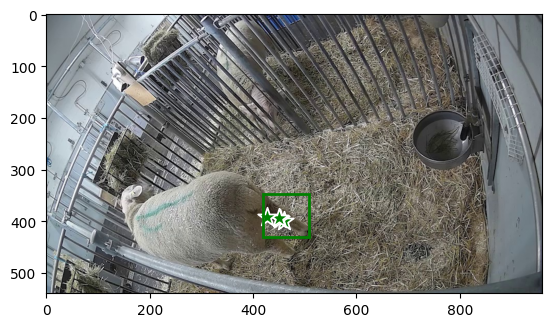

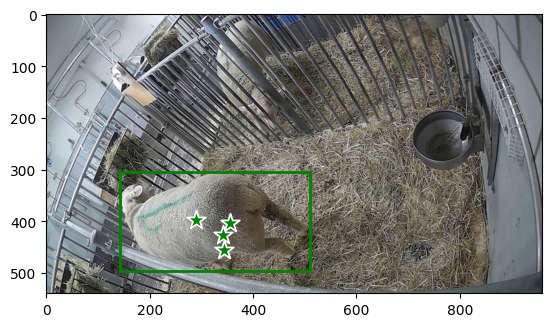

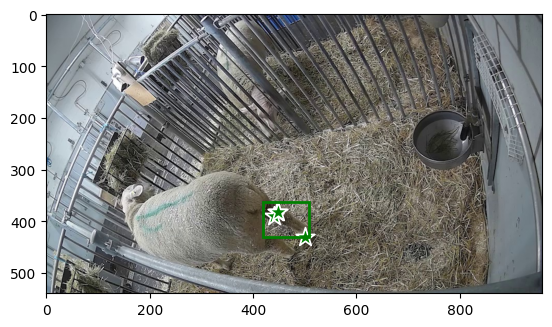

<Figure size 640x480 with 0 Axes>

In [39]:
root_path = "/workspace/good_bad/S013-20220917-110000-150000/top/split_1" 

batch_idx = 91000 - 8*500
frame_idx = batch_idx
batch_size = 500
reach = 5

frame_names = [
    p for p in os.listdir(inv_vid)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]

frame_names.sort(key=lambda p: int(os.path.splitext(p)[0]))
df = pd.read_csv(os.path.join(inv_vid, "data.csv"))

curr_frame_names = frame_names[frame_idx:frame_idx + batch_size + reach]
for frame_name in curr_frame_names[:5:]:
    frame = Image.open(os.path.join(root_path, frame_name))
    x_min = df_get(df, frame_name, 'min_x')
    y_min = df_get(df, frame_name, 'min_y')
    x_max = df_get(df, frame_name, 'max_x')
    y_max = df_get(df, frame_name, 'max_y')
    points = []
    labels = np.array([], np.int32)
    for i in range(1, 5):
        x = df_get(df, frame_name, f'rand_x_{i}')
        y = df_get(df, frame_name, f'rand_y_{i}')
        points.append([x, y])
        labels = np.append(labels, 1)
    plt.imshow(frame)
    show_points(np.array(points), labels, plt.gca())
    show_box([x_min, y_min, x_max, y_max], plt.gca())
    plt.show()
    plt.clf()